## Le plus court chemin

**Rappel:** Comme vu précédemment dans le notebook foad5_Eleve.ipynb, notre graphe est extrait d'une image.

le schéma suivant représente la décomposition de notre problème de tonte en problème résolvable par un graphe. L'image est constituée de pixels de différentes couleurs:
1. couleur noire pour les obstacles.
2. toutes les autres couleurs peuvent être traversées.

Pour le module python opencv l'image est une matrice de pixels. Les pixels noirs seront ignorés lors du parcours du graphe. Les autres pixels formeront les sommets de notre graphe. Les arêtes reliant les sommets peuvent varier en fonction de l'utilisateur; soit 4 voisins soit 8. 

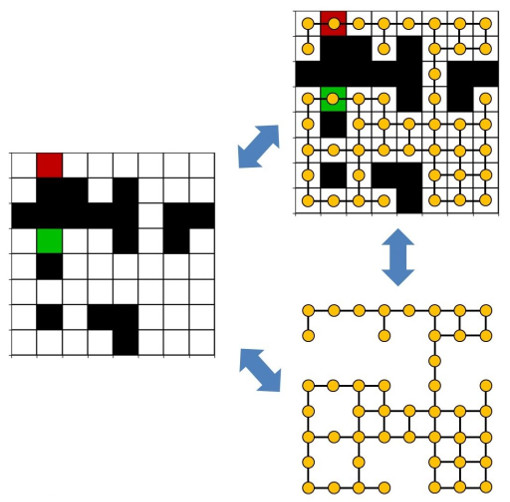

Trouver le plus court chemin, comme le montre l'illustration suivante, c'est relier le pixel de départ et le pixel d'arrivée par un circuit de la plus faible distance possible.

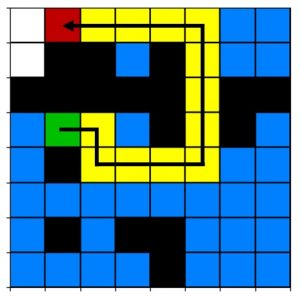

### Cas de la tondeuse:

Nous allons nous intéresser au cas où la tondeuse atteint un niveau de batterie critique et doit absolument retourner à sa station de recharge en empruntant le chemin le plus court. La base de rechargement est aux coordonnées (5,5) tandis que la tondeuse est en (80,83) comme le montre le dessin ci-dessous. La taille du pixel correspond à la largeur de coupe de la tondeuse (20cm). L'image représente donc un terrain de 120X0,2=24m de longueur et 90X0,2=18m de largeur.

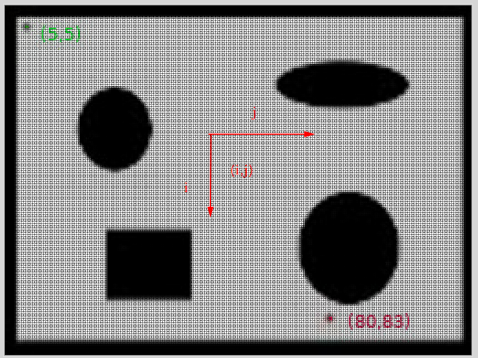

Le programme suivant permet de rechercher le plus court chemin.
Questions préliminaires:
1. Repérer les coordonnées et les ajuster aux dimensions du terrain ci-dessus.  

rep: 5x0.2= 1 m, coordonnées du point d'arrivé (1,1)  
80x0.2=16m et 83x0.2= 10.6, coordonnées du point de départ (16,10.6)

2. En observant la structure de données utilisée pour stocker les sommets adjacents, en déduire le parcours de graphe utilisé. 

rep: C'est un parcours en largeur car la structure de données utilisé est une pile FIFO :  
LIGNE 19 et 20:  
path = queue.get()  
pixel = path[-1]

3. Trouvez les sommets adjacents utilisés dans ce parcours.

rep: *Chaque sommet possède 4 voisins  
ligne 14 : (i+1,j), (i-1,j),(i,j+1), (i,j-1))*  

Maintenant éxécuter le programme pour visualiser la recherche du plus court chemin.

### *ATTENTION:* pour fermer la fenêtre opencv, appuyez sur une touche du clavier lorsque le programme est terminé.

In [4]:
# exemple permettant de visualiser la tonte d'une pelouse
# installer opencv sur la machine
#https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

from queue import Queue
import cv2

start = (5,5)
end = (80,83)

def getAdjacent(n):
    i,j = n
    return [(i+1,j), (i-1,j),(i,j+1), (i,j-1)]

def BFS(start, end, pixels):
    queue = Queue()
    queue.put([start]) # Wrapping the start tuple in a list
    while not queue.empty():
        path = queue.get() 
        pixel = path[-1]
        if pixel == end:
            return path
        for adjacent in getAdjacent(pixel):
            i,j = adjacent
            if (pixels[i,j] != 0).all():
                pixels[i,j,0] = 250 # colorier avec la couleur BGR 250,250,0
                pixels[i,j,1] = 250
                pixels[i,j,2] = 0
                new_path = list(path)
                new_path.append(adjacent)
                queue.put(new_path)
                #commenter les lignes suivantes pour la rapidité
                cv2.imshow("rechercheChemin", pixels)
                cv2.waitKey(1)
    print( "Pas de chemin trouvé.")

if __name__ == "__main__":
    cv2.namedWindow("rechercheChemin", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('rechercheChemin', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)
    chemin = BFS(start, end, img)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(chemin))
    for position in chemin:
        i,j = position
        img[i,j,0] = 0 # colorier avec la couleur BGR 0,0,250
        img[i,j,1] = 0
        img[i,j,2] = 250   
    cv2.imshow("rechercheChemin", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

height:  90  width:  120  depth:  3
taille:  154


Lancer le programme suivant.
1. Expliquez rapidement les différences entre les deux programmes.
    * rep: *Dans le 2ème programme, le chemin est plus court*
    *      *Les pixels acceptent 8 voisins, le chemin peut donc emprunter des trajectoires en diagonale*
    * 

In [5]:
# exemple permettant de visualiser la tonte d'une pelouse
# installer opencv sur la machine
#https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

from queue import Queue
import cv2

start = (5,5)
end = (80,83)

def getAdjacent(n):
    i,j = n
    return [(i,j+1),(i-1,j+1),(i-1,j),(i-1,j-1),(i,j-1),(i+1,j-1),(i+1,j),(i+1,j+1)]

def BFS(start, end, pixels):
    queue = Queue()
    queue.put([start]) # Wrapping the start tuple in a list
    while not queue.empty():
        path = queue.get() 
        pixel = path[-1]
        if pixel == end:
            return path
        for adjacent in getAdjacent(pixel):
            i,j = adjacent
            if (pixels[i,j] != 0).all():
                pixels[i,j,0] = 250 # colorier avec la couleur BGR 250,250,0
                pixels[i,j,1] = 250
                pixels[i,j,2] = 0
                new_path = list(path)
                new_path.append(adjacent)
                queue.put(new_path)
                #commenter les lignes suivantes pour la rapidité
                cv2.imshow("rechercheChemin", pixels)
                cv2.waitKey(1)
    print( "Pas de chemin trouvé.")

if __name__ == "__main__":
    cv2.namedWindow("rechercheChemin", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('rechercheChemin', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)
    chemin = BFS(start, end, img)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(chemin))
    for position in chemin:
        i,j = position
        img[i,j,0] = 0 # colorier avec la couleur BGR 0,0,250
        img[i,j,1] = 0
        img[i,j,2] = 250   
    cv2.imshow("rechercheChemin", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

height:  90  width:  120  depth:  3
taille:  87


Pour cet essai, nous allons changer l'ordre des sommets adjacents.
1. Pensez-vous que le chemin sera modifié? 
    *  
    *  rep: *je pensais intuitivement que l'ordre de stockage des voisins changerait le chemin mais l'essai me prouve que non*
    
   Vérifiez vos intuitions en éxecutant le programme suivant.

In [6]:
# exemple permettant de visualiser la tonte d'une pelouse
# installer opencv sur la machine
#https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

from queue import Queue
import cv2

start = (5,5)
end = (80,83)

def getAdjacent(n):
    i,j = n
    return [(i,j+1),(i-1,j-1),(i+1,j),(i-1,j+1),(i-1,j),(i+1,j+1),(i,j-1),(i+1,j-1)]

def BFS(start, end, pixels):
    queue = Queue()
    queue.put([start]) # Wrapping the start tuple in a list
    while not queue.empty():
        path = queue.get() 
        pixel = path[-1]
        if pixel == end:
            return path
        for adjacent in getAdjacent(pixel):
            i,j = adjacent
            if (pixels[i,j] != 0).all():
                pixels[i,j,0] = 250 # colorier avec la couleur BGR 250,250,0
                pixels[i,j,1] = 250
                pixels[i,j,2] = 0
                new_path = list(path)
                new_path.append(adjacent)
                queue.put(new_path)
                #commenter les lignes suivantes pour la rapidité
                cv2.imshow("rechercheChemin", pixels)
                cv2.waitKey(1)
    print( "Pas de chemin trouvé.")

if __name__ == "__main__":
    cv2.namedWindow("rechercheChemin", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('rechercheChemin', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)
    chemin = BFS(start, end, img)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(chemin))
    for position in chemin:
        i,j = position
        img[i,j,0] = 0 # colorier avec la couleur BGR 0,0,250
        img[i,j,1] = 0
        img[i,j,2] = 250   
    cv2.imshow("rechercheChemin", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

height:  90  width:  120  depth:  3
taille:  87


Ecrire sous forme d'algorithme les grandes étapes de la fonction BFS (aidez-vous du parcours générique d'un graphe vu dans le notebook précedent).
*  
*   
*   
*   
*  
*   
* 
```python 
file des voisins(s)  
tant que la file n'est pas vide 
   défiler le chemin et récupérer le dernier pixel  
   si le pixel correspond à l'arrivée  
      alors retourner le chemin
   Pour tous les voisins du pixel  
      Si le voisin n'est pas un obstacle
         enfiler le voisin au chemin
```



## Application sur notre tondeuse:
Maintenant que nous savons trouver le plus court chemin, nous pouvons déterminer le chemin permettant de recharger la tondeuse. Complétons le cahier des charges.
1. Nous voulons simuler un message de batterie faible en appuyant sur la touche du clavier (ici: Escape) pendant la tonte
2. Lorsque l'évènement apparait faire un affichage du message suivant: "Alerte! batterie faible!" (par un print).

Modifiez le programme en conséquence.

In [7]:
# exemple permettant de visualiser la tonte d'une pelouse
# installer opencv sur la machine
#https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

import cv2
import time

base = 20,20# coordonnées de la base de ravitaillement
i,j = base
start = (5,5)
end = (80,83)

# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def dfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop()  #Implement DFS : use .pop()
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            k = cv2.waitKey(1)
            if k == 27: #touche escape
                print("Alerte! batterie faible!")   
                
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,0
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i,j+1),(i+1,j+1),(i+1,j), (i+1,j-1), (i,j-1) , (i-1,j-1)  , (i-1,j),(i-1,j+1)]
    return seen 

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)   
    fait = dfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

height:  90  width:  120  depth:  3
Alerte! batterie faible!
taille:  8153


________________________________
Lorsqu'une alerte de charge minimum apparait pendant la tonte, la tondeuse recherche le plus court chemin entre sa position actuelle et la position de la base de rechargement.
1. Modifier le programme suivant de façon à lancer une fonction ravitaillement(i,j) affichant par un print() les coordonnées actuelles de la tondeuse.

In [9]:
# installer opencv sur la machine
#https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/


import cv2
import time

base = 20,20# coordonnées de la base de ravitaillement
i,j = base
start = (5,5)
end = (80,83)

def ravitaillement(i,j):
    print("Coordonnées actuelles i: ",i," j: ",j)
    time.sleep(4)#animation ralentie
  

# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def dfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop()  #Implement DFS : use .pop()
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            k = cv2.waitKey(1)
            if k == 27: #touche escape
                ravitaillement(i,j)
                
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,0
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i,j+1),(i+1,j+1),(i+1,j), (i+1,j-1), (i,j-1) , (i-1,j-1)  , (i-1,j),(i-1,j+1)]
    return seen 

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    #img = cv2.resize(img, (150,133), interpolation=cv2.INTER_LINEAR)
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)   
    fait = dfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

height:  90  width:  120  depth:  3
Coordonnées actuelles i:  43  j:  21
taille:  8153


_________________________________________
**Compléter** la fonction ravitaillement pour permettre de rechercher le chemin le plus court vers la base de chargement.

Remarque: Nous pouvons importer la recherche du plus court chemin précédente, comme le montre le code suivant.


In [10]:
# exemple permettant de visualiser la tonte d'une pelouse
# grâce à un parcours en profondeur
# installer opencv sur la machine
#https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

import sys  #code pour importer des modules de dossier extérieurs sur jupyter notebook
sys.path.insert(0, './scripts')
#import Bfs4voisinsCourtChemin as cc
import Bfs8voisinsCourtChemin as cc

import cv2
import time

base = 20,20# coordonnées de la base de ravitaillement
i,j = base
start = (5,5)
end = (80,83)

def ravitaillement(i,j):
    print("Demande de ravitaillement!")
    start = i,j #coordonnées de la tondeuse lors de la demande de ravitaillement          
    end = base # coordonnées de la base
    print("coordonnees i: ",i," j: ",j,"end", end," start: ",start)
    img2 = cv2.imread(r"images/jardin.pnm")
    chemin = cc.BFS(start,end,img2)
    for position in chemin:
        i,j = position
        img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,250
        img[i,j,1] = 250
        img[i,j,2] = 250 
    cv2.imshow("tonte", img)
    cv2.waitKey(1)
    time.sleep(2)#animation ralentie


# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def dfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop()  #Implement DFS : use .pop()
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            k = cv2.waitKey(1)
            if k == 27: #touche escape
                ravitaillement(i,j)
           
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,0
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i,j+1),(i+1,j+1),(i+1,j), (i+1,j-1), (i,j-1) , (i-1,j-1)  , (i-1,j),(i-1,j+1)]
    return seen 

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    #img = cv2.resize(img, (150,133), interpolation=cv2.INTER_LINEAR)
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)   
    fait = dfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

height:  90  width:  120  depth:  3
Demande de ravitaillement!
coordonnees i:  12  j:  12 end (20, 20)  start:  (12, 12)
Demande de ravitaillement!
coordonnees i:  48  j:  18 end (20, 20)  start:  (48, 18)
taille:  8142


## Version finale.
Compléter le programme de façon à totalement respecter le cahier des charges:
1. tonte
2. alerte charge minimum 
3. recherche et parcours du plus court chemin vers la base
4. rechargement (simuler par une petite temporisation)
5. retour sur la position de coupe
6. continuité de la tonte

In [5]:
# exemple permettant de visualiser la tonte d'une pelouse
# grâce à un parcours en profondeur
# installer opencv sur la machine
#https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

import sys  #code pour importer des modules de dossier extérieurs sur jupyter notebook
sys.path.insert(0, './scripts')

#import Bfs4voisinsCourtChemin as cc
import Bfs8voisinsCourtChemin as cc
import cv2
import time

base = 20,20# coordonnées de la base de ravitaillement
i,j = base
start = (5,5)
end = (80,83)

def ravitaillement(i,j):
    print("Demande de ravitaillement!")
    start = i,j #coordonnées de la tondeuse lors de la demande de ravitaillement          
    end = base # coordonnées de la base
    print("coordonnees i: ",i," j: ",j,"end", end," start: ",start)
    img2 = cv2.imread(r"images/jardin.pnm")
    chemin = cc.BFS(start,end,img2)
    for position in chemin:
        i,j = position
        img[i,j,0] = 0 # colorier avec la couleur BGR 0,0,125
        img[i,j,1] = 250
        img[i,j,2] = 250 
    cv2.imshow("tonte", img)
    cv2.waitKey(1)
    time.sleep(2)#animation ralentie
    #retour position tonte
    print("retour aux coordonnées de tonte")
    end = start 
    start = base
    print("coordonnees i: ",i," j: ",j,"end", end," start: ",start)
    img3 = cv2.imread(r"images/jardin.pnm")
    chemin = cc.BFS(start,end,img3)
    for position in chemin:
        i,j = position
        img[i,j,0] = 250 # colorier avec la couleur BGR 0,0,125
        img[i,j,1] = 0
        img[i,j,2] = 250
    cv2.imshow("tonte", img)
    cv2.waitKey(1)
    time.sleep(2)#animation ralentie
    print("Reprise du cycle normal de tonte!")
    #reprise normale

# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def dfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop()  #Implement DFS : use .pop()
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            k = cv2.waitKey(1)
            if k == 27: #touche escape
                ravitaillement(i,j)
                
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,0,125
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i,j+1),(i+1,j+1),(i+1,j), (i+1,j-1), (i,j-1) , (i-1,j-1)  , (i-1,j),(i-1,j+1)] 
    return seen 

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    #img = cv2.resize(img, (150,133), interpolation=cv2.INTER_LINEAR)
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)   
    fait = dfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

height:  90  width:  120  depth:  3
Demande de ravitaillement!
coordonnees i:  10  j:  26 end (20, 20)  start:  (10, 26)
retour aux coordonnées de tonte
coordonnees i:  20  j:  20 end (10, 26)  start:  (20, 20)
Reprise du cycle normal de tonte!
Demande de ravitaillement!
coordonnees i:  57  j:  73 end (20, 20)  start:  (57, 73)
retour aux coordonnées de tonte
coordonnees i:  20  j:  20 end (57, 73)  start:  (20, 20)
Reprise du cycle normal de tonte!
taille:  8144


_____________________________
Bravo! La pelouse vous remercie, nous allons maintenant découvrir des algorithmes différents de recherche du plus court chemin.

____________________________________________
## Découverte d'un module python
Le module python [pathfinding](https://pypi.org/project/pathfinding/) propose 6 algorithmes de recherche du plus court chemin. Il est inspiré de [pathfinding.js](https://qiao.github.io/PathFinding.js/visual/).
1. Exécuter les 6 programmes pour compléter le tableau donnant le nombre d'opérations et la longueur du chemin trouvé.
2. faire une rapide recherche pour chaque algorithme (complexité en temps et espace mémoire dans le pire des cas si vous avez le temps).
3. Conclure sur leurs avantages et inconvénients.

|Algorithme|nb d'opérations|lg du chemin|complexité en temps|complexité en espace|
|--------------|--------------|------------|-------------------|-----------------|
|  Astar       |     7340     |       154  |                   |                 |
|bestFirst     |   245        |  186       |                   |                 |
|bi_a_star     |     3529     |    154     |                   |                 |
|breadth_first |       7363   |    154     |                   |                 |
|dijkstra      |     7363     |    154     |                   |                 |
|ida-star      |  6847241     |       154  |                   |                 |

In [11]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder
import cv2

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm",0)# 90*120 pixels niveau de gris
    ret, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY) # image noire et blanc
    grid = Grid(matrix=img)
    #print(grid.height, grid.width)
    start = grid.node(5, 5)
    end = grid.node(80, 83)
    finder = AStarFinder()
    path, runs = finder.find_path(start, end, grid)
    print('operations:', runs, 'path length:', len(path))
    for position in path:
        i,j = position
        img[i,j] = 125 # colorier en gris
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

operations: 7340 path length: 154


*  
*  rep:L'algorithme A* a été créé pour que la première solution trouvée soit l'une des meilleures, c'est pourquoi il est célèbre dans des applications comme les jeux vidéo privilégiant la vitesse de calcul sur l'exactitude des résultats. Cet algorithme a été proposé pour la première fois par Peter E. Hart (en), Nils John Nilsson (en) et Bertram Raphael (en) en 1968. Il s'agit d'une extension de l'algorithme de Dijkstra 

In [12]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.best_first import BestFirst
import cv2

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm",0)# 90*120 pixels niveau de gris
    ret, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY) # image noire et blanc
    grid = Grid(matrix=img)
    #print(grid.height, grid.width)
    start = grid.node(5, 5)
    end = grid.node(80, 83)
    finder = BestFirst()
    path, runs = finder.find_path(start, end, grid)
    print('operations:', runs, 'path length:', len(path))
    for position in path:
        i,j = position
        img[i,j] = 125 # colorier en gris
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

operations: 245 path length: 186


* 
* rep: La recherche best-first (littéralement : le meilleur en premier) est un algorithme de recherche qui parcourt un graphe en explorant le nœud le plus "prometteur" selon une règle spécifique. 
La sélection du meilleur candidat à l'exploration est typiquement implémentée en utilisant une file à priorités. 

In [13]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.bi_a_star import BiAStarFinder
import cv2

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm",0)# 90*120 pixels niveau de gris
    ret, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY) # image noire et blanc
    grid = Grid(matrix=img)
    #print(grid.height, grid.width)
    start = grid.node(5, 5)
    end = grid.node(80, 83)
    finder = BiAStarFinder()
    path, runs = finder.find_path(start, end, grid)
    print('operations:', runs, 'path length:', len(path))
    for position in path:
        i,j = position
        img[i,j] = 125 # colorier en gris
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

operations: 3529 path length: 154


* 
* rep: identique à Astar avec une recherche bidirectionnelle.

In [14]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.breadth_first import BreadthFirstFinder
import cv2

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm",0)# 90*120 pixels niveau de gris
    ret, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY) # image noire et blanc
    grid = Grid(matrix=img)
    #print(grid.height, grid.width)
    start = grid.node(5, 5)
    end = grid.node(80, 83)
    finder = BreadthFirstFinder()
    path, runs = finder.find_path(start, end, grid)
    print('operations:', runs, 'path length:', len(path))
    for position in path:
        i,j = position
        img[i,j] = 125 # colorier en gris
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

operations: 7363 path length: 154


* 
* rep:C'est celui que nous avons étudié. L'algorithme de parcours en largeur (ou BFS, pour Breadth First Search en anglais) permet le parcours d'un graphe ou d'un arbre de la manière suivante : on commence par explorer un nœud source, puis ses successeurs, puis les successeurs non explorés des successeurs, etc. L'algorithme de parcours en largeur permet de calculer les distances de tous les nœuds depuis un nœud source dans un graphe non pondéré (orienté ou non orienté). Il peut aussi servir à déterminer si un graphe non orienté est connexe

In [15]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.dijkstra import DijkstraFinder
import cv2

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm",0)# 90*120 pixels niveau de gris
    ret, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY) # image noire et blanc
    grid = Grid(matrix=img)
    #print(grid.height, grid.width)
    start = grid.node(5, 5)
    end = grid.node(80, 83)
    finder = DijkstraFinder()
    path, runs = finder.find_path(start, end, grid)
    print('operations:', runs, 'path length:', len(path))
    for position in path:
        i,j = position
        img[i,j] = 125 # colorier en gris
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

operations: 7363 path length: 154


* 
* rep: L'algorithme de Dijkstra pour trouver le chemin le plus court entre a et b. Il choisit le sommet non visité avec la distance la plus faible, calcule la distance à travers lui à chaque voisin non visité, et met à jour la distance du voisin si elle est plus petite.

In [16]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.ida_star import IDAStarFinder
import cv2

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm",0)# 90*120 pixels niveau de gris
    ret, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY) # image noire et blanc
    grid = Grid(matrix=img)
    #print(grid.height, grid.width)
    start = grid.node(5, 5)
    end = grid.node(80, 83)
    finder = IDAStarFinder()
    path, runs = finder.find_path(start, end, grid)
    print('operations:', runs, 'path length:', len(path))
    for position in path:
        i,j = position
        img[i,j] = 125 # colorier en gris
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

operations: 6847241 path length: 154


* 
* rep:IDA* (Iterated-Depending A*) qui est un algorithme A* qui effectue des approfondissements successifs en rapport avec des valeurs limites pour f(n) ; IDA* est complète et optimale et sa complexité en espace mémoire est de l`ordre O(b×p)